# PER
A Perceptron with default parameter values

In [27]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
from utils import config, ProcessDataset, model_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Latin and Greek train and val data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.
+ Calling helper method to load the dataset of training and validating

In [28]:
Latin_X_Train, Latin_Y_Train, Latin_X_Val, Latin_Y_Val = ProcessDataset.get_Latin_Train_Val()
Greek_X_Train, Greek_Y_Train, Greek_X_Val, Greek_Y_Val = ProcessDataset.get_Greek_Train_Val()

### Training the perceptron model

In [29]:
clf_latin = Perceptron()
clf_latin.fit(Latin_X_Train,Latin_Y_Train)
print(clf_latin.score(Latin_X_Train,Latin_Y_Train))

clf_greek = Perceptron()
clf_greek.fit(Greek_X_Train,Greek_Y_Train)
print(clf_greek.score(Greek_X_Train,Greek_Y_Train))

0.9941471571906354
0.842287472752917


### Export models

In [30]:
from joblib import dump

dump(clf_latin, './models/PER_clf_latin.joblib')
dump(clf_greek, './models/PER_clf_greek.joblib')

['./models/PER_clf_greek.joblib']

### Import models for evaluating

In [31]:
from joblib import load

clf_latin = load('./models/PER_clf_latin.joblib')
clf_greek = load('./models/PER_clf_greek.joblib')

### Validating the model with K-Fold Cross-Validation

In [32]:
kfold = KFold(n_splits=10, random_state=100)

results_kfold = cross_val_score(clf_latin, Latin_X_Val, Latin_Y_Val, cv=kfold)
print("Accuracy of latin perceptron: %.2f%%" % (results_kfold.mean()*100.0)) 

results_kfold = cross_val_score(clf_greek, Greek_X_Val, Greek_Y_Val, cv=kfold)
print("Accuracy of greek perceptron: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy of latin perceptron: 42.88%
Accuracy of greek perceptron: 82.11%


As we can see, the accuracy of the greek perceptron is better than the latin one, likely due to having more training data for the greek characters.

## Test the models

### Load the test dataset

In [33]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

### Make prediction and export results to `csv` files

In [34]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y_Pred).to_csv(os.path.join(config.OUTPUT_PATH, "PER-DS1.csv"), header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y_Pred).to_csv(os.path.join(config.OUTPUT_PATH, "PER-DS2.csv"), header=None)

## Assert the accuracy of the models:

### 1. Confusion Matrix

#### Latin Character Predicition Model:

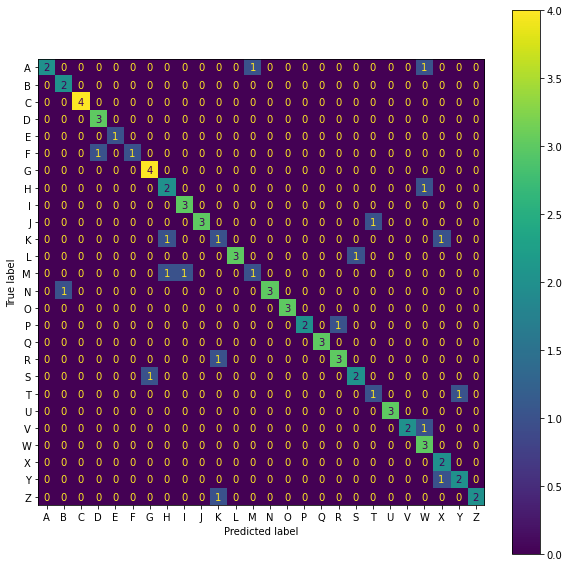

In [35]:
model_utils.show_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test, isGreekLetter=False)

#### Greek Character Prediction Model:

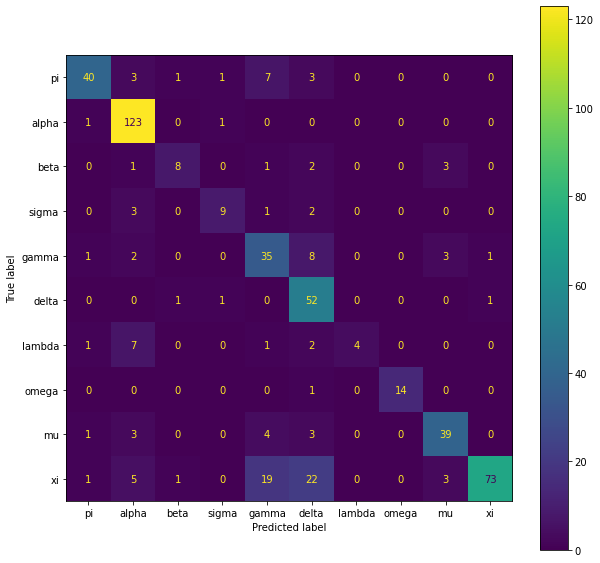

In [36]:
model_utils.show_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test, isGreekLetter=True)

### 2. Precision, recall, and f1-measure for each class

#### Latin Character Prediciton Model:

In [37]:
model_utils.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

,precision,recall,f1
0,1.000000,0.500000,0.666667
1,0.666667,1.000000,0.800000
2,1.000000,1.000000,1.000000
3,0.750000,1.000000,0.857143
4,1.000000,1.000000,1.000000
5,1.000000,0.500000,0.666667
6,0.800000,1.000000,0.888889
7,0.500000,0.666667,0.571429
8,0.750000,1.000000,0.857143
9,1.000000,0.750000,0.857143


#### Greek Character Prediction Model:

In [38]:
model_utils.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.888889,0.727273,0.800000
1,0.836735,0.984000,0.904412
2,0.727273,0.533333,0.615385
3,0.750000,0.600000,0.666667
4,0.514706,0.700000,0.593220
5,0.547368,0.945455,0.693333
6,1.000000,0.266667,0.421053
7,1.000000,0.933333,0.965517
8,0.812500,0.780000,0.795918
9,0.973333,0.588710,0.733668


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### Perceptron model on DS1 - Latin characters

In [39]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred)*100)+"%")
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 77.21518987341773%
Macro-average f1 of perceptron model on DS1: 76.65140415140415%
Weighted-average f1 of perceptron model on DS1: 77.25537472372915%


#### Perceptron model on DS2 - Greek characters

In [40]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 76.49325626204238%
Macro-average f1 of perceptron model on DS1: 71.89173301087288%
Weighted-average f1 of perceptron model on DS1: 76.23235663488833%
